In [21]:
# Packages / libraries
import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
from scipy import stats

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.float_format', lambda x: '%.5f' % x if int(x) != x else '%d' % int(x))

# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,6)})

# Datetime lib
from pandas import to_datetime
import itertools
import warnings
import datetime
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler, scale
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA


# suppress warnings about features that 
# will be deprecated from pandas coming versions
import warnings
warnings.filterwarnings('ignore')



In [22]:
df_analysis = pd.read_csv(r'df_analysis.csv', index_col=0)
df_analysis.head()

,meter,consumption_mean_2020-10-04,consumption_mean_2020-10-11,consumption_mean_2020-10-18,consumption_mean_2020-10-25,consumption_mean_2020-11-01,consumption_mean_2020-11-08,consumption_mean_2020-11-15,consumption_mean_2020-11-22,consumption_mean_2020-11-29,...,amps_coeff_var_2021-10-10,amps_coeff_var_2021-10-17,amps_coeff_var_2021-10-24,amps_coeff_var_2021-10-31,amps_coeff_var_2021-11-07,amps_coeff_var_2021-11-14,amps_coeff_var_2021-11-21,amps_coeff_var_2021-11-28,amps_coeff_var_2021-12-05,has_ev
0,396,0.12865,0.13534,0.11287,0.12403,0.11915,0.14365,0.12749,0.15297,0.12252,...,0.78682,0.96708,1.05775,0.73771,0.74139,0.89329,0.62964,0.73393,NaN,0
1,428,0.08531,0.08507,0.07870,0.07921,0.07851,0.07694,0.10682,0.12458,0.12209,...,2.59167,2.52445,2.53612,2.60612,2.58252,2.72720,2.37862,2.77656,2.42744,0
2,829,0.25597,0.54722,0.32927,0.39700,0.26681,0.29882,0.26391,0.25868,0.25877,...,1.20990,1.11637,1.30085,1.26790,1.12647,1.24449,1.27859,1.10064,1.11438,0
3,4970,0.04902,0.05702,0.05103,0.04177,0.04251,0.04389,0.04821,0.04951,0.04594,...,0.50252,0.73604,0.67715,0.64340,0.81602,0.74207,0.73700,0.65516,0.28955,0
4,5228,0.21829,0.31229,0.11272,0.19382,0.11177,0.22105,0.18344,0.21368,0.17912,...,1.04237,1.11588,1.01204,1.16352,1.13319,1.00931,1.63329,0.81379,0.96095,0


In [23]:
df_analysis.shape

(1053, 808)

In [24]:
for column in df_analysis:
    unique_vals = np.unique(df_analysis[column])
    nr_values = len(unique_vals)
    if nr_values < 12:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature meter :1053
The number of values for feature consumption_mean_2020-10-04 :987
The number of values for feature consumption_mean_2020-10-11 :993
The number of values for feature consumption_mean_2020-10-18 :993
The number of values for feature consumption_mean_2020-10-25 :995
The number of values for feature consumption_mean_2020-11-01 :998
The number of values for feature consumption_mean_2020-11-08 :989
The number of values for feature consumption_mean_2020-11-15 :1002
The number of values for feature consumption_mean_2020-11-22 :1004
The number of values for feature consumption_mean_2020-11-29 :1003
The number of values for feature consumption_mean_2020-12-06 :1002
The number of values for feature consumption_mean_2020-12-13 :1003
The number of values for feature consumption_mean_2020-12-20 :1002
The number of values for feature consumption_mean_2020-12-27 :1003
The number of values for feature consumption_mean_2021-01-03 :1007
The number of values fo

In [25]:
df_analysis = df_analysis.fillna(0)

In [26]:
X = df_analysis.drop('has_ev', axis=1).values # Input features (attributes)
y = df_analysis['has_ev'].values # Target vector
print('X shape: {}'.format(np.shape(X)))
print('y shape: {}'.format(np.shape(y)))

for_plots = df_analysis[[
 'consumption_std_2021-12-05',
 'consumption_longest_cycle_2020-10-04',
 'consumption_times_above_threshold_2020-10-04',
 'amps_mean_2020-10-04',
 'amps_longest_cycle_2021-12-05',
 'amps_times_above_threshold_2020-10-04',
 'has_ev'
]]


X shape: (1053, 807)
y shape: (1053,)


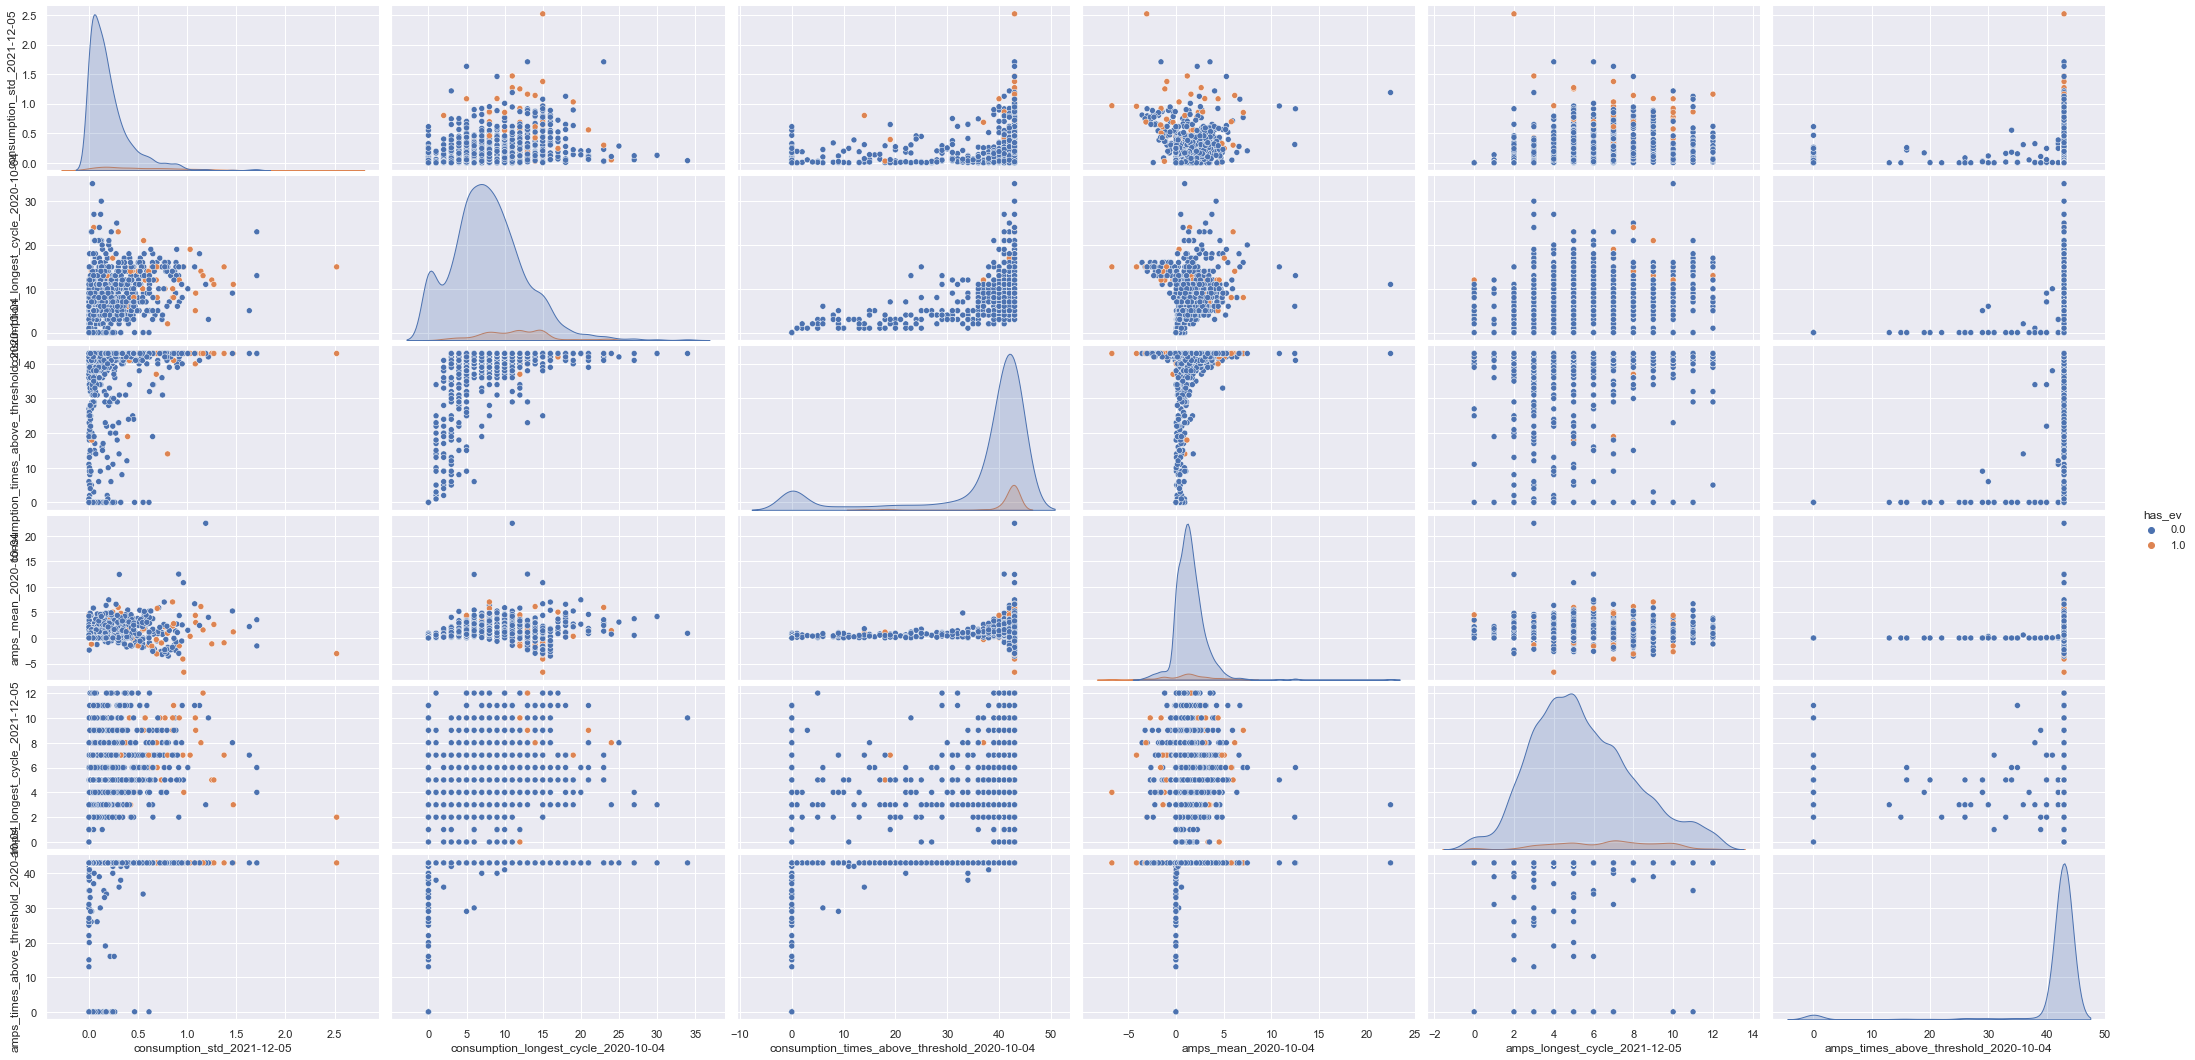

In [27]:
# Visualize the data using seaborn Pairplots
g = sns.pairplot(for_plots, hue = 'has_ev', diag_kws={'bw': 0.2}, aspect=2) # blue: not having EV, orange: have EV

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, test_size=0.25, random_state=0) # can try differen split proportion

### Decision tree

In [38]:
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=2456) #max_depth=2: 2 layers
dtree.fit(X_train, y_train)

# Doc:https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=2456)

In [46]:
# Calculating Feature Importance (FI)
for i, column in enumerate(df_analysis.drop('has_ev', axis=1)):
    # print('Importance of feature {}:, {:.3f}'.format(column, dtree.feature_importances_[i]))
    
    fi = pd.DataFrame({'Variable': [column], 'Feature Importance Score': [dtree.feature_importances_[i]]})
    
    try:
        final_fi = pd.concat([final_fi,fi], ignore_index = True)
    except:
        final_fi = fi
    
        
# Ordering the data
final_fi = final_fi.sort_values('Feature Importance Score', ascending = False).reset_index(drop=True)            
final_fi = final_fi[['Variable', 'Feature Importance Score']]
final_fi.head(40)

,Variable,Feature Importance Score
0,consumption_std_2021-11-07,0.42355
1,amps_times_above_threshold_2021-05-16,0.39268
2,consumption_std_2021-11-07,0.30968
3,consumption_std_2021-11-07,0.30968
4,consumption_std_2021-11-07,0.30968
5,consumption_std_2021-11-07,0.30968
6,consumption_std_2021-11-07,0.30968
7,consumption_std_2021-11-07,0.30968
8,consumption_std_2021-11-07,0.30968
9,consumption_std_2021-11-07,0.30323


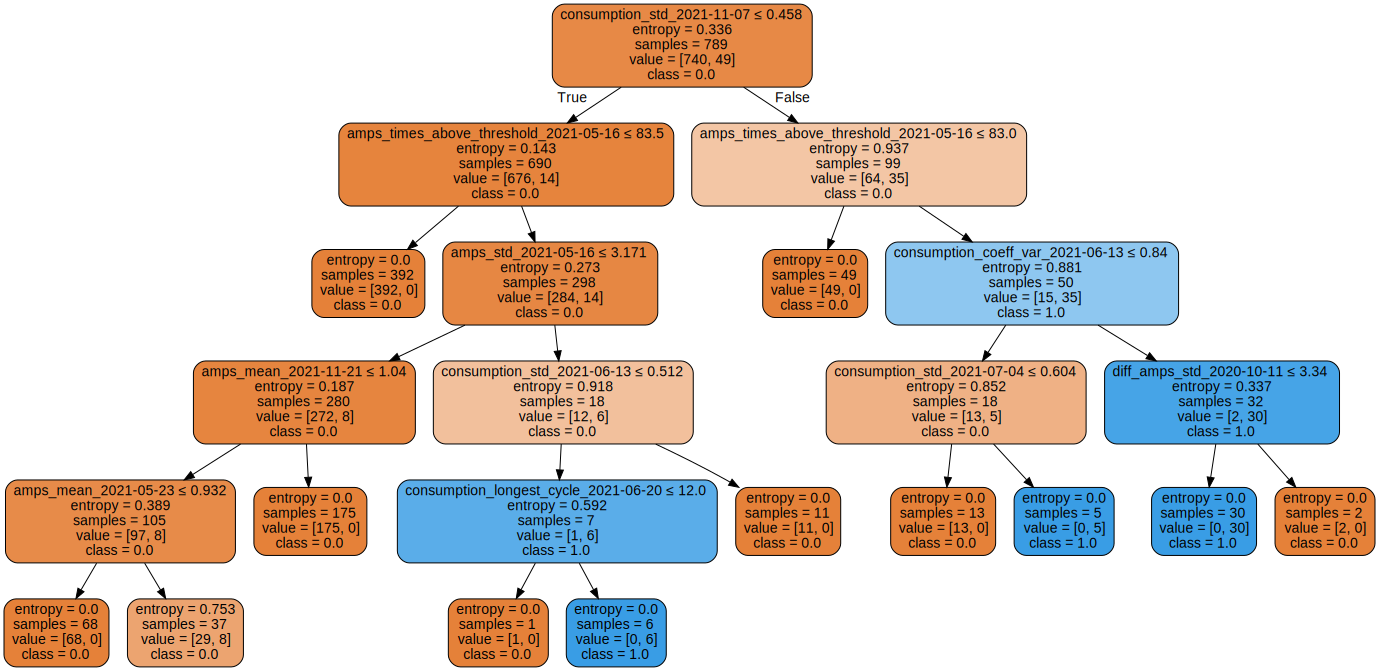

In [47]:

# Draw a tree
import graphviz 

dot_data = tree.export_graphviz(dtree, out_file=None, 
    feature_names=df_analysis.drop('has_ev', axis=1).columns,    
    class_names=df_analysis['has_ev'].unique().astype(str),  
    filled=True, rounded=True,  
    special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [44]:
# Accuracy on Train

print("Training Accuracy is: ", dtree.score(X_train, y_train))
# Accuracy on Test
print("Testing Accuracy is: ", dtree.score(X_test, y_test))
# Oveall accuracy
print("Overall Accuracy is: ", dtree.score(X, y))

Training Accuracy is:  0.9886524822695035
Testing Accuracy is:  0.9511494252873564
Overall Accuracy is:  0.976258309591643


In [42]:
# Confusion Matrix function

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

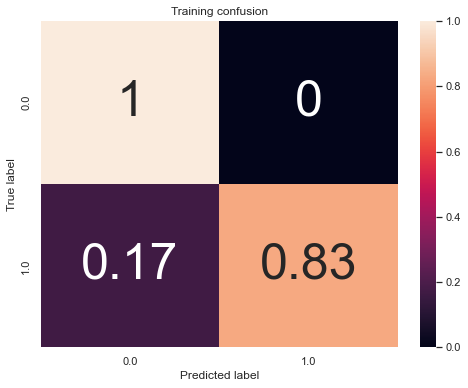

In [47]:
y_pred = dtree.predict(X_train)

# Plotting Confusion Matrix (cm)
cm = confusion_matrix(y_train, y_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=dtree.classes_, title='Training confusion')
# plot_confusion_matrix(cm, classes=dt.classes_, title='Training confusion')

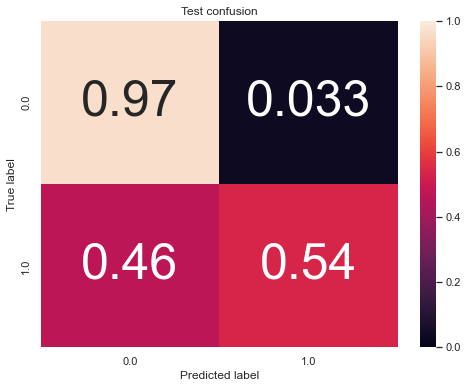

In [48]:
y_pred = dtree.predict(X_test)

# Plotting Confusion Matrix (cm)
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=dtree.classes_, title='Test confusion')
# plot_confusion_matrix(cm, classes=dt.classes_, title='Test confusion')

In [49]:
# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)


# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print ("The True Positive rate / Recall per class is: ",TPR)

# Precision or positive predictive value
PPV = TP/(TP+FP)
print ("The Precision per class is: ",PPV)

# False positive rate or False alarm rate
FPR = FP/(FP+TN)
print ("The False Alarm rate per class is: ",FPR)

# False negative rate or Miss Rate
FNR = FN/(TP+FN)
print ("The Miss Rate rate per class is: ",FNR)

# Classification error
CER = (FP+FN)/(TP+FP+FN+TN)
print ("The Classification error of each class is", CER)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print ("The Accuracy of each class is", ACC)
print("")

##Total averages :
print ("The average Recall is: ",TPR.sum()/2)
print ("The average Precision is: ",PPV.sum()/2)
print ("The average False Alarm is: ",FPR.sum()/2)
print ("The average Miss Rate rate is: ",FNR.sum()/2)
print ("The average Classification error is", CER.sum()/2)
print ("The average Accuracy is", ACC.sum()/2)

# Explanations: https://youtu.be/0HDy6n3UD5M

The True Positive rate / Recall per class is:  [0.967164 0.538462]
The Precision per class is:  [0.981818 0.388889]
The False Alarm rate per class is:  [0.461538 0.032836]
The Miss Rate rate per class is:  [0.032836 0.461538]
The Classification error of each class is [0.048851 0.048851]
The Accuracy of each class is [0.951149 0.951149]

The average Recall is:  0.7528128587830081
The average Precision is:  0.6853535353535354
The average False Alarm is:  0.24718714121699198
The average Miss Rate rate is:  0.24718714121699198
The average Classification error is 0.04885057471264368
The average Accuracy is 0.9511494252873564


## Random Forests

In [50]:
y_train.sum()

47.0

Training Accuracy is:  1.0
Testing Accuracy is:  0.9798850574712644


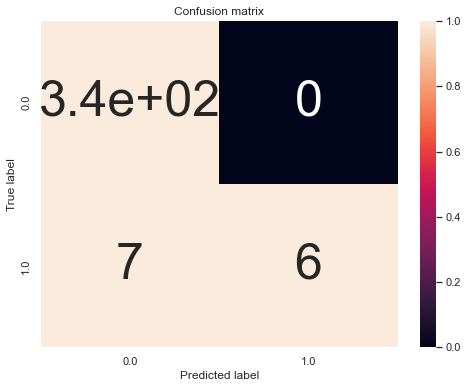

In [69]:
rf = RandomForestClassifier(n_estimators=120, criterion='gini', random_state=456466)
rf.fit(X_train, y_train)
prediction_test = rf.predict(X=X_test)
prediction_train = rf.predict(X=X_train)

# source: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

# Accuracy on Test
print("Training Accuracy is: ", rf.score(X_train, y_train))
# Accuracy on Train
print("Testing Accuracy is: ", rf.score(X_test, y_test))

# Confusion Matrix
cm = confusion_matrix(y_test, prediction_test)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm, classes=rf.classes_)


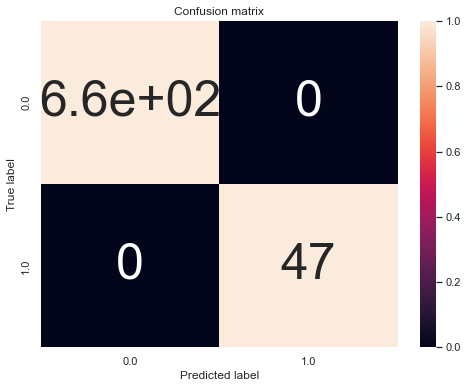

In [70]:
# Confusion Matrix
cm_train = confusion_matrix(y_train, prediction_train)
cm_norm = cm_train/cm_train.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_train, classes=rf.classes_)

In [78]:
# Tunning Random Forest

from itertools import product
n_estimators = 100
max_features = [1, 'sqrt', 'log2']
max_depths = [None, 2, 3, 4, 5]
criterion = ['gini', 'entropy']
for c, f, d in product(criterion, max_features, max_depths): # with product we can iterate through all possible combinations
    rf = RandomForestClassifier(n_estimators=n_estimators, 
                                criterion=c, 
                                max_features=f, 
                                max_depth=d, 
                                n_jobs=2,
                                random_state=245)
    rf.fit(X_train, y_train)
    prediction_test = rf.predict(X=X_test)
    print('Classification accuracy on test set with criterion = {}, max features = {} and max_depth = {}: {:.3f}'.format(c, f, d, accuracy_score(y_test,prediction_test)))

    prediction_train = rf.predict(X=X_train)
    print('Classification accuracy on test set with criterion = {}, max features = {} and max_depth = {}: {:.3f}'.format(c, f, d, accuracy_score(y_train,prediction_train)))

    # For each combination (f,d), you'll see classification accuracy & confusion matrix, choose the best combination 
    # (in our case: having highest true negative, lowest false negative)

Classification accuracy on test set with criterion = gini, max features = 1 and max_depth = None: 0.966
Classification accuracy on test set with criterion = gini, max features = 1 and max_depth = None: 1.000
Classification accuracy on test set with criterion = gini, max features = 1 and max_depth = 2: 0.963
Classification accuracy on test set with criterion = gini, max features = 1 and max_depth = 2: 0.933
Classification accuracy on test set with criterion = gini, max features = 1 and max_depth = 3: 0.963
Classification accuracy on test set with criterion = gini, max features = 1 and max_depth = 3: 0.933
Classification accuracy on test set with criterion = gini, max features = 1 and max_depth = 4: 0.963
Classification accuracy on test set with criterion = gini, max features = 1 and max_depth = 4: 0.938
Classification accuracy on test set with criterion = gini, max features = 1 and max_depth = 5: 0.963
Classification accuracy on test set with criterion = gini, max features = 1 and max_d

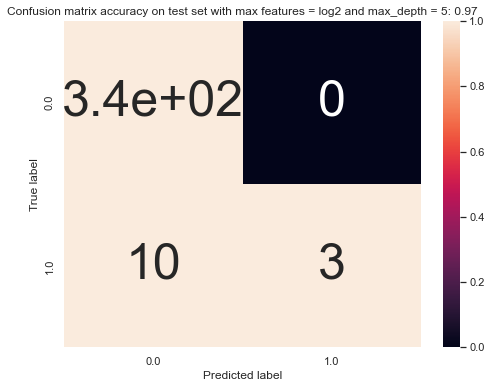

In [79]:
# confusion matrix for test
cm = confusion_matrix(y_test, prediction_test)
cm_norm = cm/cm.sum(axis=0)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm, classes=rf.classes_, title='Confusion matrix accuracy on test set with max features = {} and max_depth = {}: {:.2f}'.format(
    f, d, accuracy_score(y_test, prediction_test)))


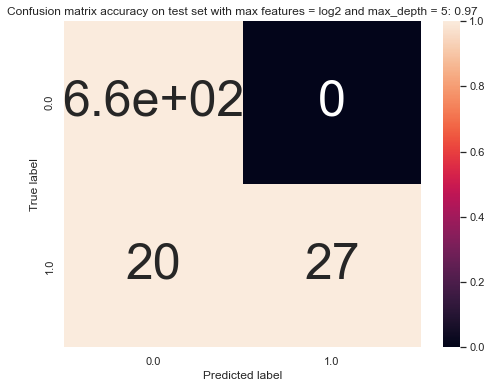

In [81]:
# confusion matrix for train
cm = confusion_matrix(y_train, prediction_train)
#   cm_norm = cm/cm.sum(axis=0)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm, classes=rf.classes_, title='Confusion matrix accuracy on test set with max features = {} and max_depth = {}: {:.2f}'.format(
    f, d, accuracy_score(y_train, prediction_train)))


## Xgboost

In [82]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost

classifier=xgboost.XGBClassifier(objective='binary:logistic')

params={
    "learning_rate":[0.05,0.10,0.15,0.20,0.25,0.30],
    "max_depth":[2,3,4,5,6,8,10,12,15],
    "min_child_weight":[1,3,5,7],
    "gamma":[0.0,0.1,0.2,0.3,0.4],
    "colsample_bytree":[0.3,0.4,0.5,0.7,1],
    "scale_pos_weight": [4, 15, 16]}

clf=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',cv=5,verbose=3)
# it will run over all combinations and look for the best ROC curve
# source: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html


# fitting it
clf.fit(X,y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[19:27:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.25, max_depth=10, min_child_weight=1, scale_pos_weight=4;, score=0.971 total time=   0.3s
[19:27:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.25, max_depth=10, min_child_weight=1, scale_pos_weight=4;, score=0.974 total time=   0.3s
[19:27:29] WARNI

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints...
                                           scale_pos_weight=None,
                                           subsample=None, tree_method=None,
                                      

In [83]:
# best parameters
clf.best_params_

{'scale_pos_weight': 4,
 'min_child_weight': 1,
 'max_depth': 10,
 'learning_rate': 0.25,
 'gamma': 0.2,
 'colsample_bytree': 0.5}

In [84]:
# getting the model with the best parameters
clf.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, gamma=0.2, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=20, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=4, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

[19:28:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


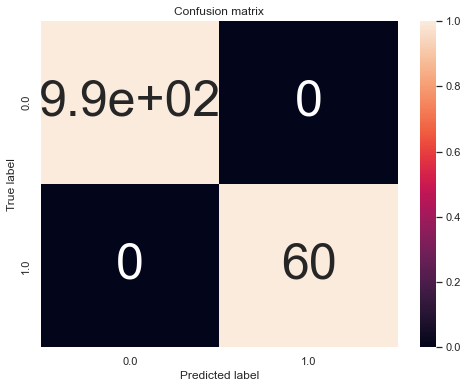

In [85]:
# fiting the model with the best parameters

final_model = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, gamma=0.2, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=np.nan, monotone_constraints='()',
              n_estimators=100, n_jobs=20, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=4, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

# fitting it
final_model.fit(X,y)

pred_xgboost = final_model.predict(X)

# Confusion Matrix
cm = confusion_matrix(y, pred_xgboost)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm, classes=rf.classes_)

In [87]:
# Accuracy on Test
print("Training Accuracy is: ", clf.score(X_train, y_train))
# Accuracy on Train
print("Testing Accuracy is: ", clf.score(X_test, y_test))

Training Accuracy is:  1.0
Testing Accuracy is:  1.0


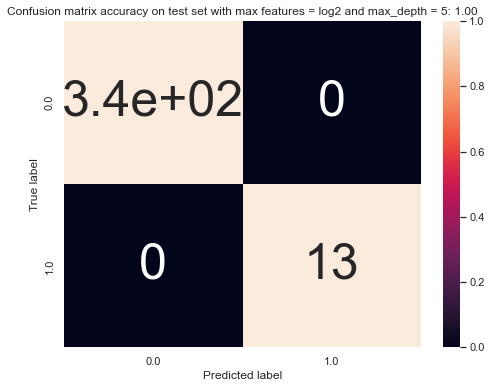

In [88]:
pred_xgboost_test = final_model.predict(X_test)
cm = confusion_matrix(y_test, pred_xgboost_test)
#   cm_norm = cm/cm.sum(axis=0)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm, classes=rf.classes_, title='Confusion matrix accuracy on test set with max features = {} and max_depth = {}: {:.2f}'.format(
    f, d, accuracy_score(y_test, pred_xgboost_test)))
pred_xgboost_test = final_model.predict(X_test)


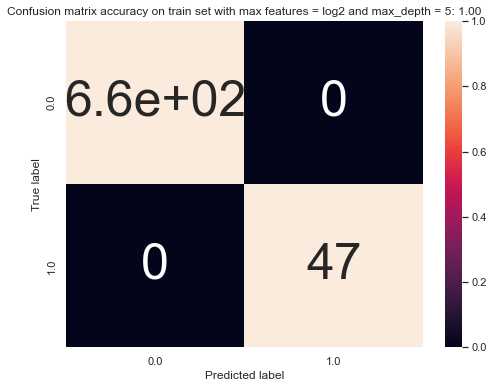

In [89]:
pred_xgboost_train = final_model.predict(X_train)
cm = confusion_matrix(y_train, pred_xgboost_train)
#   cm_norm = cm/cm.sum(axis=0)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm, classes=rf.classes_, title='Confusion matrix accuracy on train set with max features = {} and max_depth = {}: {:.2f}'.format(
    f, d, accuracy_score(y_train, pred_xgboost_train)))
pred_xgboost_train = final_model.predict(X_train)

# 6 Support Vector Machines

In [92]:
from sklearn.svm import SVC

In [93]:
# Preliminary SVM
svc = SVC(random_state=245)
svc.fit(X_train, y_train)

SVC(random_state=245)

In [ ]:
# Plemininary Confusion matrix
plot_confusion_matrix(svc, X_test, y_test, )

In [98]:
# Cross validation
param_grid = [
    {'C': [0.5, 1, 10, 100],
    'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']}
]

optimal_params = GridSearchCV(
    SVC(),
    param_grid,
    cv=5,
    scoring = 'accuracy',
    verbose=0
)

optimal_params.fit(X_train, y_train)
print(optimal_params.best_params_)
# We'll get the optimal parameters

{'C': 0.5, 'gamma': 'scale', 'kernel': 'rbf'}


In [99]:
# Optimal SVM model
svc = SVC(random_state=245, C= 0.5, gamma= 'scale', kernel='rbf')
svc.fit(X_train, y_train)

SVC(C=0.5, random_state=245)